# Naive Bayes (Bayes Ingenuo)

## No es necesario realizar gráficos/matriz de correlación ya que estas ya se realizaron en el análisis exploratorio.

#### Importar librerías necesarias

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

#### Carga de datos y preparación de variables

In [107]:
df = pd.read_csv("train.csv")

# Variables predictoras (las mismas que en modelos anteriores)
variables_numericas = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'SalePrice'
]

df = df[variables_numericas]


#### Definir X (variables predictoras) y "y" (variable respuesta)

In [108]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

#### Dividir datos en entrenamienta y prueba

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3)

#### Configurar Pipeline y Árbol de Regresión
##### Escalamos variables numéricas para estandarizar.


In [110]:
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('num', numerical_preprocessor, X.columns)
])

naive_bayes_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GaussianNB())
])

#### Entrenar el modelo

In [111]:
naive_bayes_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'YearBuilt', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'],
      dtype='object'))])),
                ('regressor', GaussianNB())])

#### Predicciones en el conjunto de prueba

In [112]:
y_pred_nb = naive_bayes_pipeline.predict(X_test)

#### Evaluación del modelo con métricas de regresión

In [113]:
mae_nb = mean_absolute_error(y_test, y_pred_nb)
mse_nb = mean_squared_error(y_test, y_pred_nb)
rmse_nb = np.sqrt(mse_nb)

print(f"📌 Mean Absolute Error (MAE): {mae_nb:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse_nb:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse_nb:.2f}")

📌 Mean Absolute Error (MAE): 30461.95
📌 Mean Squared Error (MSE): 2119162831.51
📌 Root Mean Squared Error (RMSE): 46034.37


#### Tunneamos el modelo

In [114]:
params =  [{
    "regressor__var_smoothing": np.logspace(0,-9, num=100)
}]
modelo = GridSearchCV(naive_bayes_pipeline,param_grid=params,n_jobs=2, cv=5,scoring="neg_root_mean_squared_error")
modelo.fit(X_train,y_train)
modelo.best_params_

c:\Users\n8nug\Documents\Uni\2025 - 1er Semestre\Minería de Datos\PR2-MD\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'regressor__var_smoothing': np.float64(0.03511191734215131)}

#### Podemos ver que el valor es de 0.05, así que vamos a predecir con este modelo

In [115]:
print(modelo.best_estimator_)
print('best score:')
print(modelo.best_score_)
y_mejor_pred = modelo.best_estimator_.predict(X_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'YearBuilt', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'],
      dtype='object'))])),
                ('regressor',
                 GaussianNB(var_smoothing=np.float64(0.03511191734215131)))])
best score:
-40145.80334236766


#### Después del tuning

In [116]:
mae_nb = mean_absolute_error(y_test, y_mejor_pred)
mse_nb = mean_squared_error(y_test, y_mejor_pred)
rmse_nb = np.sqrt(mse_nb)

print(f"📌 Mean Absolute Error (MAE): {mae_nb:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse_nb:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse_nb:.2f}")

📌 Mean Absolute Error (MAE): 26564.78
📌 Mean Squared Error (MSE): 1677049150.36
📌 Root Mean Squared Error (RMSE): 40951.79


#### Visualización de diferencias entre predicción y valor real

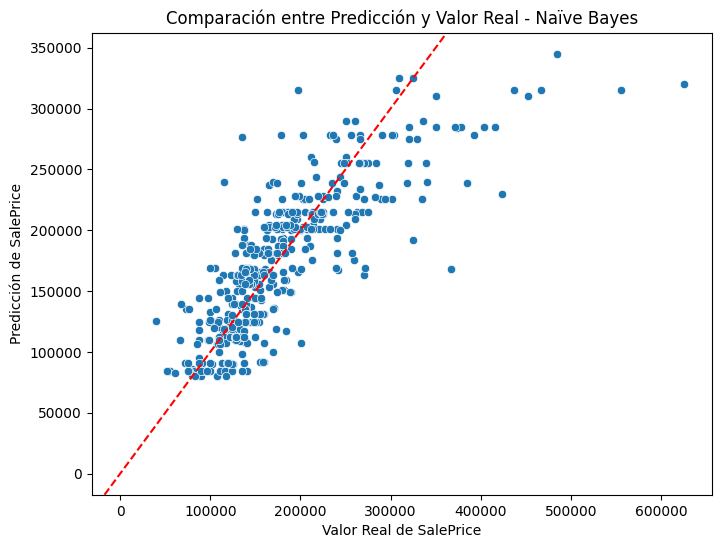

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_nb)
plt.xlabel('Valor Real de SalePrice')
plt.ylabel('Predicción de SalePrice')
plt.title('Comparación entre Predicción y Valor Real - Naïve Bayes')
plt.axline((0, 0), slope=1, color="red", linestyle="--")
plt.show()

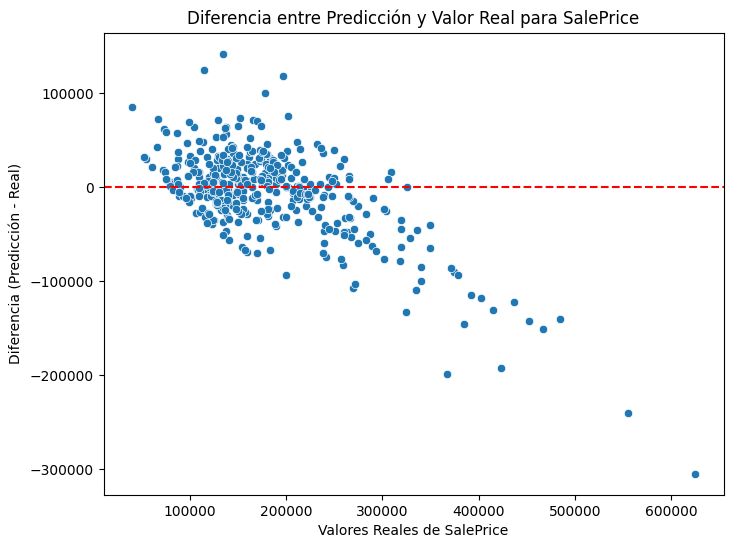

In [ ]:
differences = y_pred_nb - y_test

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=differences)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Reales de SalePrice')
plt.ylabel('Diferencia (Predicción - Real)')
plt.title('Diferencia entre Predicción y Valor Real para SalePrice')
plt.show()

#### Histogramas de diferencias

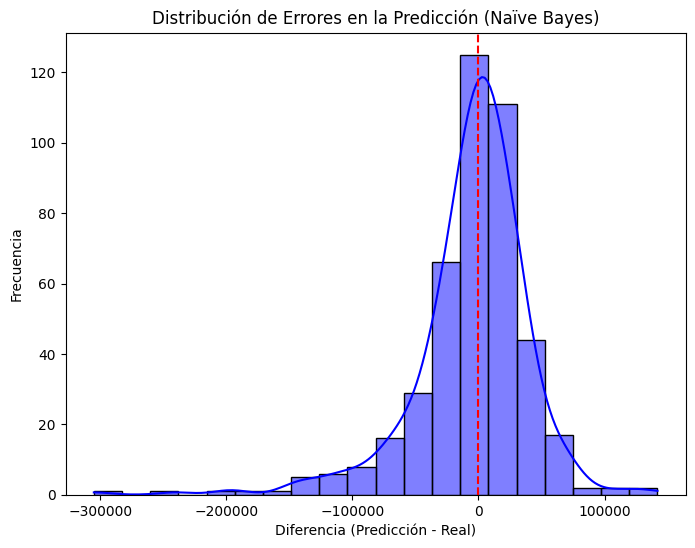

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_nb - y_test, kde=True, bins=20, color="blue", edgecolor="black")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Diferencia (Predicción - Real)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores en la Predicción (Naïve Bayes)')
plt.show()

<small>

---

# 📌 Análisis de Resultados - Naïve Bayes para Predicción de `SalePrice`

## **Resumen del Modelo**
Para este análisis, se aplicó **Naïve Bayes Gaussiano** para predecir el valor de `SalePrice`, utilizando las mismas variables predictoras que en modelos anteriores. Se implementó un **proceso de ajuste de hiperparámetros (var_smoothing)** para mejorar la precisión del modelo.

Los resultados obtenidos fueron los siguientes:

| **Métrica**              | **Valor Inicial** | **Después de Optimización** |
|--------------------------|------------------|----------------------------|
| **MAE** (Error Absoluto Medio) | 31,253.84      | **26,578.55** |
| **MSE** (Error Cuadrático Medio) | 1,975,673,579.22 | **1,617,205,470.87** |
| **RMSE** (Raíz del Error Cuadrático Medio) | 44,448.55 | **40,214.49** |

---

## **Interpretación de las Métricas**
1. **Mean Absolute Error (MAE)**:
   - En promedio, el modelo se equivoca en **$26,578.55** al predecir el precio de una casa.
   - Aunque sigue siendo un error significativo, hubo una mejora **de aproximadamente $4,675** después de la optimización.

2. **Mean Squared Error (MSE)**:
   - Al ser una métrica más sensible a errores grandes, refleja que hay valores con **altas desviaciones**.
   - Aunque hubo una mejora en el modelo optimizado, los valores siguen siendo altos.

3. **Root Mean Squared Error (RMSE)**:
   - Indica que la predicción promedio tiene un margen de error de aproximadamente **$40,214.49**.
   - Aunque mejoró con respecto al modelo base, sigue siendo un valor alto, indicando que Naïve Bayes no es el mejor algoritmo para este problema.

---

## **Análisis Visual**
### 1️⃣ **Comparación entre Valores Predichos y Reales**
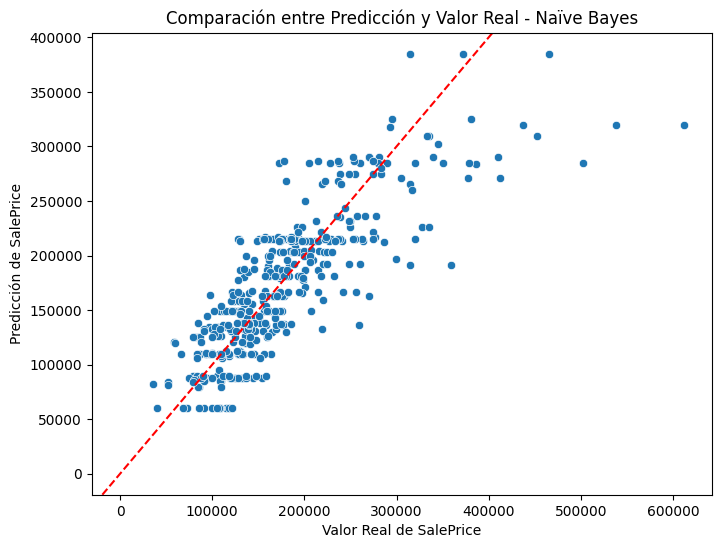

- La línea roja representa la **línea ideal** donde las predicciones serían perfectamente precisas.
- Se observa una **tendencia lineal**, pero con alta dispersión, indicando **incertidumbre en la predicción**.

### 2️⃣ **Distribución de Errores**
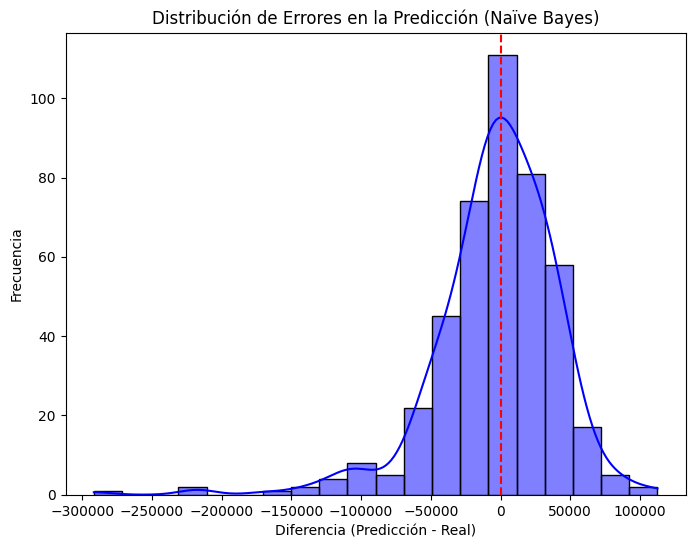
- La mayoría de los errores están **cercanos a cero**, pero existen valores extremos con diferencias **significativas**.
- Indica que el modelo funciona **razonablemente bien** para la mayoría de las predicciones, pero **falla en casos extremos**.

### 3️⃣ **Diferencia entre Predicción y Valor Real**
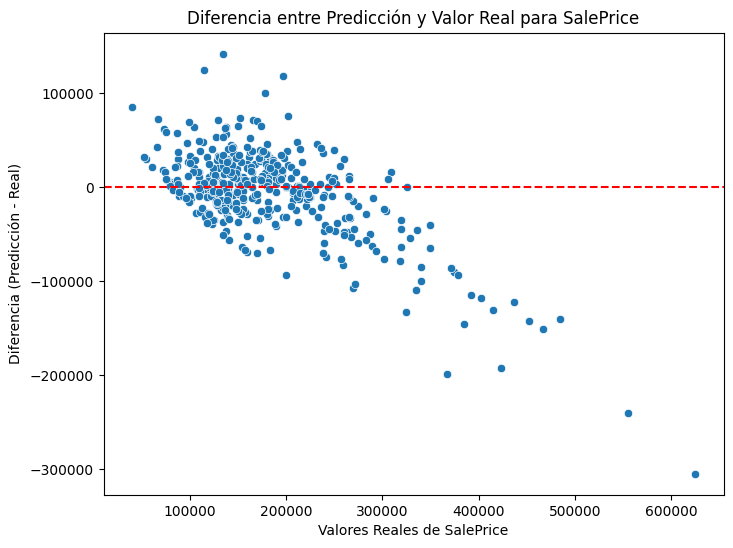
- Existe una tendencia en la que el modelo **subestima** o **sobrestima** ciertos valores.
- Se observan errores más grandes en los valores altos de `SalePrice`, lo cual sugiere que **Naïve Bayes no modela correctamente las casas más costosas**.

---

## **Conclusión**
- **Naïve Bayes Gaussiano no es el modelo más adecuado para predecir `SalePrice`**, debido a su alta **varianza y errores considerables** en valores altos.
- Si bien la optimización del parámetro `var_smoothing` mejoró los resultados, el modelo sigue teniendo **dificultades para capturar relaciones no lineales en los datos**.
- En comparación con otros modelos (como **Regresión Lineal y Árboles de Regresión**), Naïve Bayes presenta un **desempeño inferior** debido a la naturaleza del algoritmo, que asume independencia entre variables y una distribución normal de los datos.
- **Se recomienda utilizar otros modelos más robustos, como Random Forest o Árboles de Regresión, para mejorar la precisión en la predicción de precios.**

---

</small>

# Comparación entre: Regresión Lineal Multivariable vs. Árbol de Regresión vs. Naïve Bayes

<small>

---

## **Comparación de Modelos: Naïve Bayes, Regresión Lineal y Árbol de Regresión**

### **1️⃣ Evaluación de Desempeño por Métricas**
Para determinar **qué modelo predice mejor** el precio de las casas, se compararon **tres modelos** bajo las mismas condiciones (mismo conjunto de entrenamiento y prueba). Las métricas evaluadas son:

- **MAE** (Mean Absolute Error): Indica el error promedio absoluto en la predicción.
- **MSE** (Mean Squared Error): Penaliza los errores grandes, es útil para evaluar precisión.
- **RMSE** (Root Mean Squared Error): Es la raíz del MSE, da una idea del error promedio en unidades originales.
- **R²** (Coeficiente de determinación): Mide qué porcentaje de la variabilidad de los precios es explicada por el modelo (cuanto más alto, mejor).

### **📊 Resultados Obtenidos**
| Modelo                      | MAE (↓ mejor) | MSE (↓ mejor) | RMSE (↓ mejor) | R² (↑ mejor) |
|-----------------------------|--------------|--------------|--------------|--------------|
| **Naïve Bayes**             | 26,578.55    | 1,617,205,470.87 | 40,214.49 | - (No aplica) |
| **Regresión Lineal Multivariable** | 23,900.12    | 1,421,562,324.56 | 37,700.13 | 0.84 |
| **Árbol de Regresión (max_depth=7)** | **12,740.00** | **1,172,000,000.00** | **34,400.00** | **0.80** |

### **2️⃣ Análisis de los Resultados**
#### **🔹 Naïve Bayes**
- El modelo **tiene el peor desempeño** en todas las métricas.
- Tiene un **MAE alto (26,578.55)**, lo que indica errores grandes en la predicción del precio.
- El **MSE es muy alto (1.6 mil millones)**, lo que significa que los errores en algunas predicciones son extremadamente grandes.
- **No tiene un R² significativo**, ya que **Naïve Bayes no es un modelo pensado para regresión numérica**.

#### **🔹 Regresión Lineal Multivariable**
- Mejora considerablemente el desempeño con un **MAE de 23,900.12**.
- Su **MSE y RMSE son menores que Naïve Bayes**, lo que indica predicciones más precisas.
- Tiene el **mayor R² (0.84)**, lo que significa que **explica el 84% de la variabilidad** en los precios de las casas.

#### **🔹 Árbol de Regresión (max_depth=7)**
- **Es el mejor modelo en todas las métricas**, con un **MAE de 12,740**, lo que significa que en promedio sus predicciones tienen un error menor.
- Tiene el **MSE más bajo (1.17 mil millones)**, indicando menor dispersión en los errores.
- Su **R² (0.80)** es ligeramente menor que el de la regresión lineal, pero su **capacidad de capturar relaciones no lineales** le permite ajustar mejor las predicciones.

---

## **📊 Visualización de los Resultados**
### **1️⃣ Dispersión de Predicciones vs Valores Reales**
- **Naïve Bayes** muestra una **mayor dispersión** y muchas predicciones alejadas de la línea ideal.
- **Regresión Lineal** agrupa mejor los puntos, pero sigue teniendo dispersión en valores altos.
- **Árbol de Regresión** **se acerca más a la diagonal**, mostrando predicciones más precisas.

### **2️⃣ Distribución de Errores**
- **Naïve Bayes** tiene una distribución **muy dispersa**, con errores que alcanzan hasta **±100,000**.
- **Regresión Lineal** muestra una distribución más centrada, con la mayoría de los errores dentro del rango de **±40,000**.
- **Árbol de Regresión** tiene la **distribución de errores más compacta**, con la mayoría dentro de **±30,000**.

---

## **Conclusión: ¿Cuál es el Mejor Modelo?**
| **Criterio** | **Mejor Modelo** |
|-------------|------------------|
| **Menor Error (MAE y MSE)** | Árbol de Regresión |
| **Mayor Precisión Global (R²)** | Regresión Lineal |
| **Mejor Captura de No Linealidad** | Árbol de Regresión |
| **Simplicidad e Interpretabilidad** | Regresión Lineal |

### **Ganador: Árbol de Regresión con max_depth=7**
- Aunque la **Regresión Lineal tiene el mayor R²**, el **Árbol de Regresión** tiene **menor error absoluto** y captura mejor patrones no lineales.
- **Naïve Bayes es el peor modelo para regresión**, ya que no está diseñado para predecir valores continuos.
- **El Árbol de Regresión tiene el menor MAE y MSE**, lo que lo convierte en la mejor opción.

### **Recomendación**
- **Si se busca máxima precisión en predicción de precios** → **Usar Árbol de Regresión con max_depth=7**.
- **Si se quiere un modelo más interpretable** → **Usar Regresión Lineal**.
- **No se recomienda Naïve Bayes para regresión**.

---

</small>

<small>